# Create bar plots with individual data and SD error bars

Import modules

In [5]:
import pandas as pd
import seaborn as sns
#sns.set(style="white",font_scale=2)
import matplotlib.pyplot as plt

Read in data

In [6]:
path = "/Users/dhewitt/Data/Touch/CE-UK-Collaboration/UK/ERPAnalysis/"
fileName  = "AllERP_csd_FC1-FCz-FC2_150_200" 
fileType = ".xlsx"

fullpath = (path + fileName + fileType)

colnames = ["ID", "sOther", "sSelf", "fOther", "fSelf"]
df_wide = pd.read_excel(path + fileName + fileType, header=None, names=colnames)
df = df_wide.melt(id_vars="ID", var_name="Condition", value_name="Amplitude")

xAxis= "Condition" #Specify the name of your x axis, this should matach the df
yAxis = "Amplitude" #specify the name of your y axis, this should match the df



In [7]:
figSize = 3
timesSmaller = 8.5/figSize
lW = 1.5/timesSmaller #indiivdual datapoint line width
dotsize = 13/timesSmaller #indiv data point dot size
eW = 3.57/timesSmaller #bar chart line width
spineW = 1/timesSmaller
sns.set(style="white",font_scale=3.5/timesSmaller)

Create plots

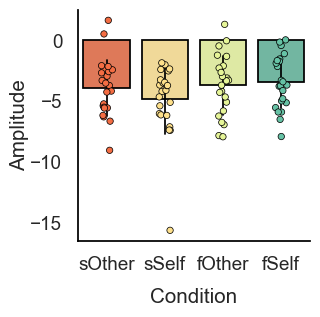

In [8]:
def insert_line_breaks(label):
    return label.replace(" ", "\n")

#f, ax = plt.subplots(figsize=(figSize*1.60, figSize)) # for a flatter, wider chart
f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 1

# Insert line breaks in the axis labels - comment this out and the 'def insert line breaks' if you don't want it
df[xAxis] = df[xAxis].apply(insert_line_breaks)

# Draw the bar chart
ax = sns.barplot(
    data=df, 
    x= xAxis, 
    y= yAxis, 
    errcolor="black",
    edgecolor="black", 
    linewidth=eW,
    palette="Spectral",
    ci='sd', # plot SD bars
    errwidth = eW
)

# Draw the individual data points
sns.stripplot(
    data=df, 
    x= xAxis, 
    y= yAxis,  
    edgecolor="black", 
    palette="Spectral",
    linewidth=lW,
    size = dotsize

)


plt.savefig(path + fileName +".svg", format='svg', dpi=1200, bbox_inches='tight')